## Widing notebook cells

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container {width:80% !important;}</style>"))

In [252]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import set_config
%matplotlib inline
sns.set_theme(context='talk',style='darkgrid', font_scale=1.2, rc={'figure.figsize':[18,8]})
filterwarnings('ignore')
set_config(display="diagram")

### Data Explanation
* interest rate indicates the 3-month interest rate between banks.
* credit shows if the customer has enough credit to avoid defaulting.
* The  march and may are Boolean variables that account for when the call was made to the specific customer.
* The previous variable shows whether the any previous marketing campaign was successful with this customer.
* duration indicates the time since the last contact was made with a given consumer.

### Target
* We want to know whether the bank marketing strategy was successful by classification Ml models , your Target is column y.

In [253]:
df = pd.read_csv('Bank_Data_Diploma.csv')
df.head(3)

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0,1,0,0,117,no
1,0.767,0,0,2,1,274,yes
2,4.858,0,1,0,0,167,no


In [254]:
encoder = {'yes':1, 'no':0}
df['y'] = df.y.map(encoder)

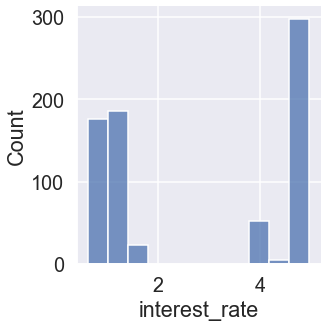

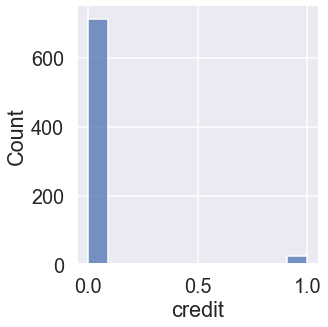

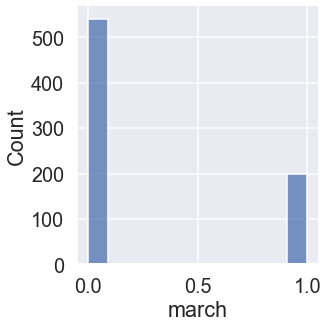

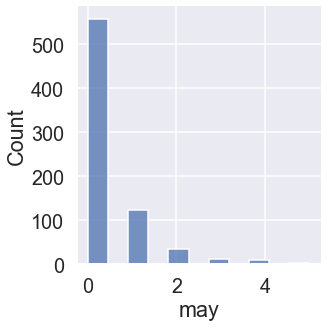

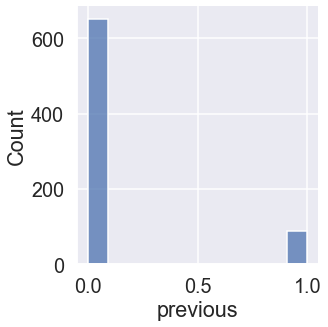

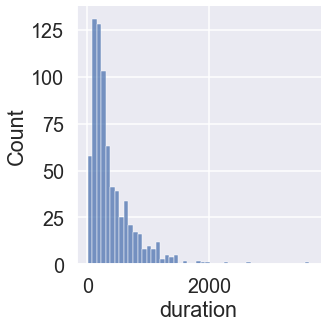

In [255]:
for col in df.iloc[:,:-1].columns:
    sns.displot(df[col])
    plt.show()

In [256]:
df.iloc[:,:-1].describe()

,interest_rate,credit,march,may,previous,duration
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,2.861672,0.033784,0.268919,0.375676,0.118919,387.182432
std,1.880510,0.180794,0.443698,0.797121,0.323912,365.236673
min,0.635000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,1.045250,0.000000,0.000000,0.000000,0.000000,154.000000
50%,1.498000,0.000000,0.000000,0.000000,0.000000,263.000000
75%,4.957000,0.000000,1.000000,0.000000,0.000000,496.500000
max,4.970000,1.000000,1.000000,5.000000,1.000000,3643.000000


In [257]:
for col in df.iloc[:,:-1].columns:
    display(f"{col} : {df[col].corr(df['y'])}")

'interest_rate : -0.47118060008043927'

'credit : 0.17203024616155596'

'march : -0.17981538237982478'

'may : 0.2917870680840848'

'previous : 0.3172842091578555'

'duration : 0.4496719417017989'

In [258]:
X = df.drop(columns=['y'])
y = df['y']

##### Pipeline  creation woth logestic regressin model

In [259]:
steps = list()
steps.append(('scaler', StandardScaler()))
steps.append(('Polyfeature',PolynomialFeatures(degree=5)))
steps.append(('model',LogisticRegression(penalty='l1',C=0.9,solver='liblinear')))
pipe = Pipeline(steps=steps)

In [260]:
# cv = RepeatedStratifiedKFold(n_repeats=3, n_splits=10,random_state=1)
# score = cross_val_score(pipe, X, y, cv= cv, n_jobs=-1, scoring='accuracy')

In [261]:
score = cross_validate(pipe, X, y, cv = 10, scoring='accuracy', n_jobs=-1, return_train_score=True)

In [262]:
print('Train Accuracy: %.3f' % (score['train_score'].mean()*100))
print('Test Accuracy: %.3f' % (score['test_score'].mean()*100))

Train Accuracy: 88.138
Test Accuracy: 86.486


##### Pipeline  creation woth logestic regressin model

In [263]:
steps = list()
steps.append(('scaler', MinMaxScaler()))
#steps.append(('Polyfeature',PolynomialFeatures(degree=5)))
steps.append(('model',KNeighborsClassifier()))
pipe = Pipeline(steps=steps)

In [264]:
score = cross_validate(pipe, X, y, cv = 10, scoring='accuracy', n_jobs=-1, return_train_score=True)

In [265]:
print('Train Accuracy: %.3f' % (score['train_score'].mean()*100))
print('Test Accuracy: %.3f' % (score['test_score'].mean()*100))

Train Accuracy: 89.610
Test Accuracy: 86.351


## it seems that the logestic is a slightly better than knn so it will be my choice

In [266]:
x_train, x_test, y_train, y_tes = train_test_split(X, y, test_size= 0.33, stratify=y, random_state=7)

In [267]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', KNeighborsClassifier())])

In [268]:
yhat = pipe.predict(x_test)
y_train_hat = pipe.predict(x_train)

In [269]:
print('Test Accuracy: %.3f' % (accuracy_score(y_tes,yhat)*100))
print('Trian Accuracy: %.3f' % (accuracy_score(y_train,y_train_hat)*100))

Test Accuracy: 86.531
Trian Accuracy: 89.697


## By Anas ^_^